# One-period debt with exogenous IMF lending

This notebook implements the one-period debt algorithm and treats IMF lending as an exogenous policy `l(g, eps)` with rate `R_l`.
The IMF loan is stationary by state, so the net transfer is `(1 - R_l) * l(g, eps)` each period.

In [1]:
using LinearAlgebra, Statistics
include("src/structs.jl")
include("src/utils.jl")
include("src/solver.jl")


solve_model (generic function with 1 method)

In [2]:
# Initialize model with default parameters and grids
model = init_model()


Model(201, 2, 9, [-0.4, -0.395, -0.39, -0.385, -0.38, -0.375, -0.37, -0.365, -0.36, -0.355  …  0.555, 0.56, 0.565, 0.57, 0.575, 0.58, 0.585, 0.59, 0.595, 0.6], [0.98, 1.02], [-2.4999999999999996, -1.8749999999999996, -1.2499999999999998, -0.6249999999999999, 0.0, 0.6249999999999999, 1.2499999999999998, 1.8749999999999996, 2.4999999999999996], [0.9 0.1; 0.1 0.9], [0.5570068699066142 0.3856221884823344 … 0.0 0.0; 0.1256745544051113 0.48718110067632536 … 4.4630965589931274e-14 0.0; … ; 3.05930623565157e-19 4.4590226953759516e-14 … 0.4871811006763255 0.1256745544051113; 1.2137688924283599e-24 1.1006052846161052e-18 … 0.3856221884823344 0.5570068699066142], [0.5013061829159527 0.05570068699066142 … 0.0 0.0; 0.05570068699066142 0.5013061829159527 … 0.0 0.0; … ; 1.092392003185524e-24 1.21376889242836e-25 … 0.5013061829159527 0.05570068699066142; 1.21376889242836e-25 1.092392003185524e-24 … 0.05570068699066142 0.5013061829159527], 0.95, 2.0, 0.02, 0.01, 0.1, 0.5, [0.9, 0.9], [1.0, 1.0], 1.02, 

In [3]:
sol = solve_model(model)
mean(sol.d)


0.33941404090657823

In [4]:
# Diagnostics: iteration counts, errors, and per-iteration timing
println("Outer iterations: ", sol.outer_iters)
println("Final outer error: ", sol.outer_errs[end])

for i in 1:sol.outer_iters
    println("iter=", i,
        ", vnd_err=", sol.outer_errs[i],
        ", vd_err=", sol.vd_errs[i],
        ", x_err=", sol.x_errs[i],
        ", vd_iters=", sol.vd_iters[i],
        ", x_iters=", sol.x_iters[i],
        ", time_s=", sol.outer_times[i])
end


Outer iterations: 200
Final outer error: 7.260728828839547e-6
iter=1, vnd_err=1.9815647813268917, vd_err=9.274105536860588e-7, x_err=9.419255161957629e-7, vd_iters=71, x_iters=98, time_s=0.07616686820983887
iter=2, vnd_err=0.3312502788729681, vd_err=9.160224685444973e-7, x_err=9.365765052948838e-7, vd_iters=56, x_iters=53, time_s=0.023743152618408203
iter=3, vnd_err=0.4685539298479249, vd_err=8.144434957557678e-7, x_err=9.37334753203789e-7, vd_iters=36, x_iters=53, time_s=0.020907878875732422
iter=4, vnd_err=0.31941460867328075, vd_err=8.077154056707059e-7, x_err=7.770068584100898e-7, vd_iters=13, x_iters=73, time_s=0.017194032669067383
iter=5, vnd_err=0.2389415742551897, vd_err=7.680695937040127e-7, x_err=9.940686723219905e-7, vd_iters=6, x_iters=128, time_s=0.021891117095947266
iter=6, vnd_err=0.1712428918649742, vd_err=7.033633870889844e-7, x_err=9.595357411962269e-7, vd_iters=6, x_iters=198, time_s=0.030550003051757812
iter=7, vnd_err=0.15756735779750386, vd_err=6.297730585913541e-

In [7]:
sol = solve_model(model; sol = sol)    # reuse vnd/vd if non-empty
mean(sol.d)

0.33941404090657823

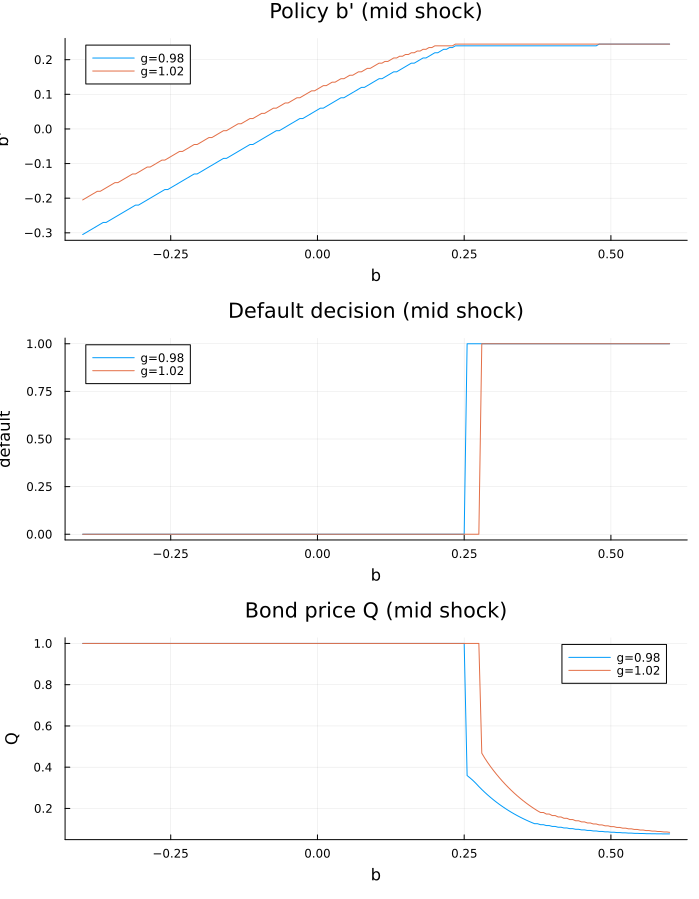

In [8]:
using Plots

b = model.b
g = model.g
eps = model.eps
e_idx = Int(cld(model.Ne, 2))

p1 = plot(title = "Policy b' (mid shock)", xlabel = "b", ylabel = "b'")
p2 = plot(title = "Default decision (mid shock)", xlabel = "b", ylabel = "default")
p3 = plot(title = "Bond price Q (mid shock)", xlabel = "b", ylabel = "Q")

for gi in 1:model.Ng
    bprime_policy = b[sol.b_policy_idx[:, gi, e_idx]]
    plot!(p1, b, bprime_policy, label = "g=$(g[gi])")
    plot!(p2, b, Float64.(sol.d[:, gi, e_idx]), label = "g=$(g[gi])")
    plot!(p3, b, sol.Q[:, gi, e_idx], label = "g=$(g[gi])")
end

plot(p1, p2, p3, layout = (3, 1), size = (700, 900))
